In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

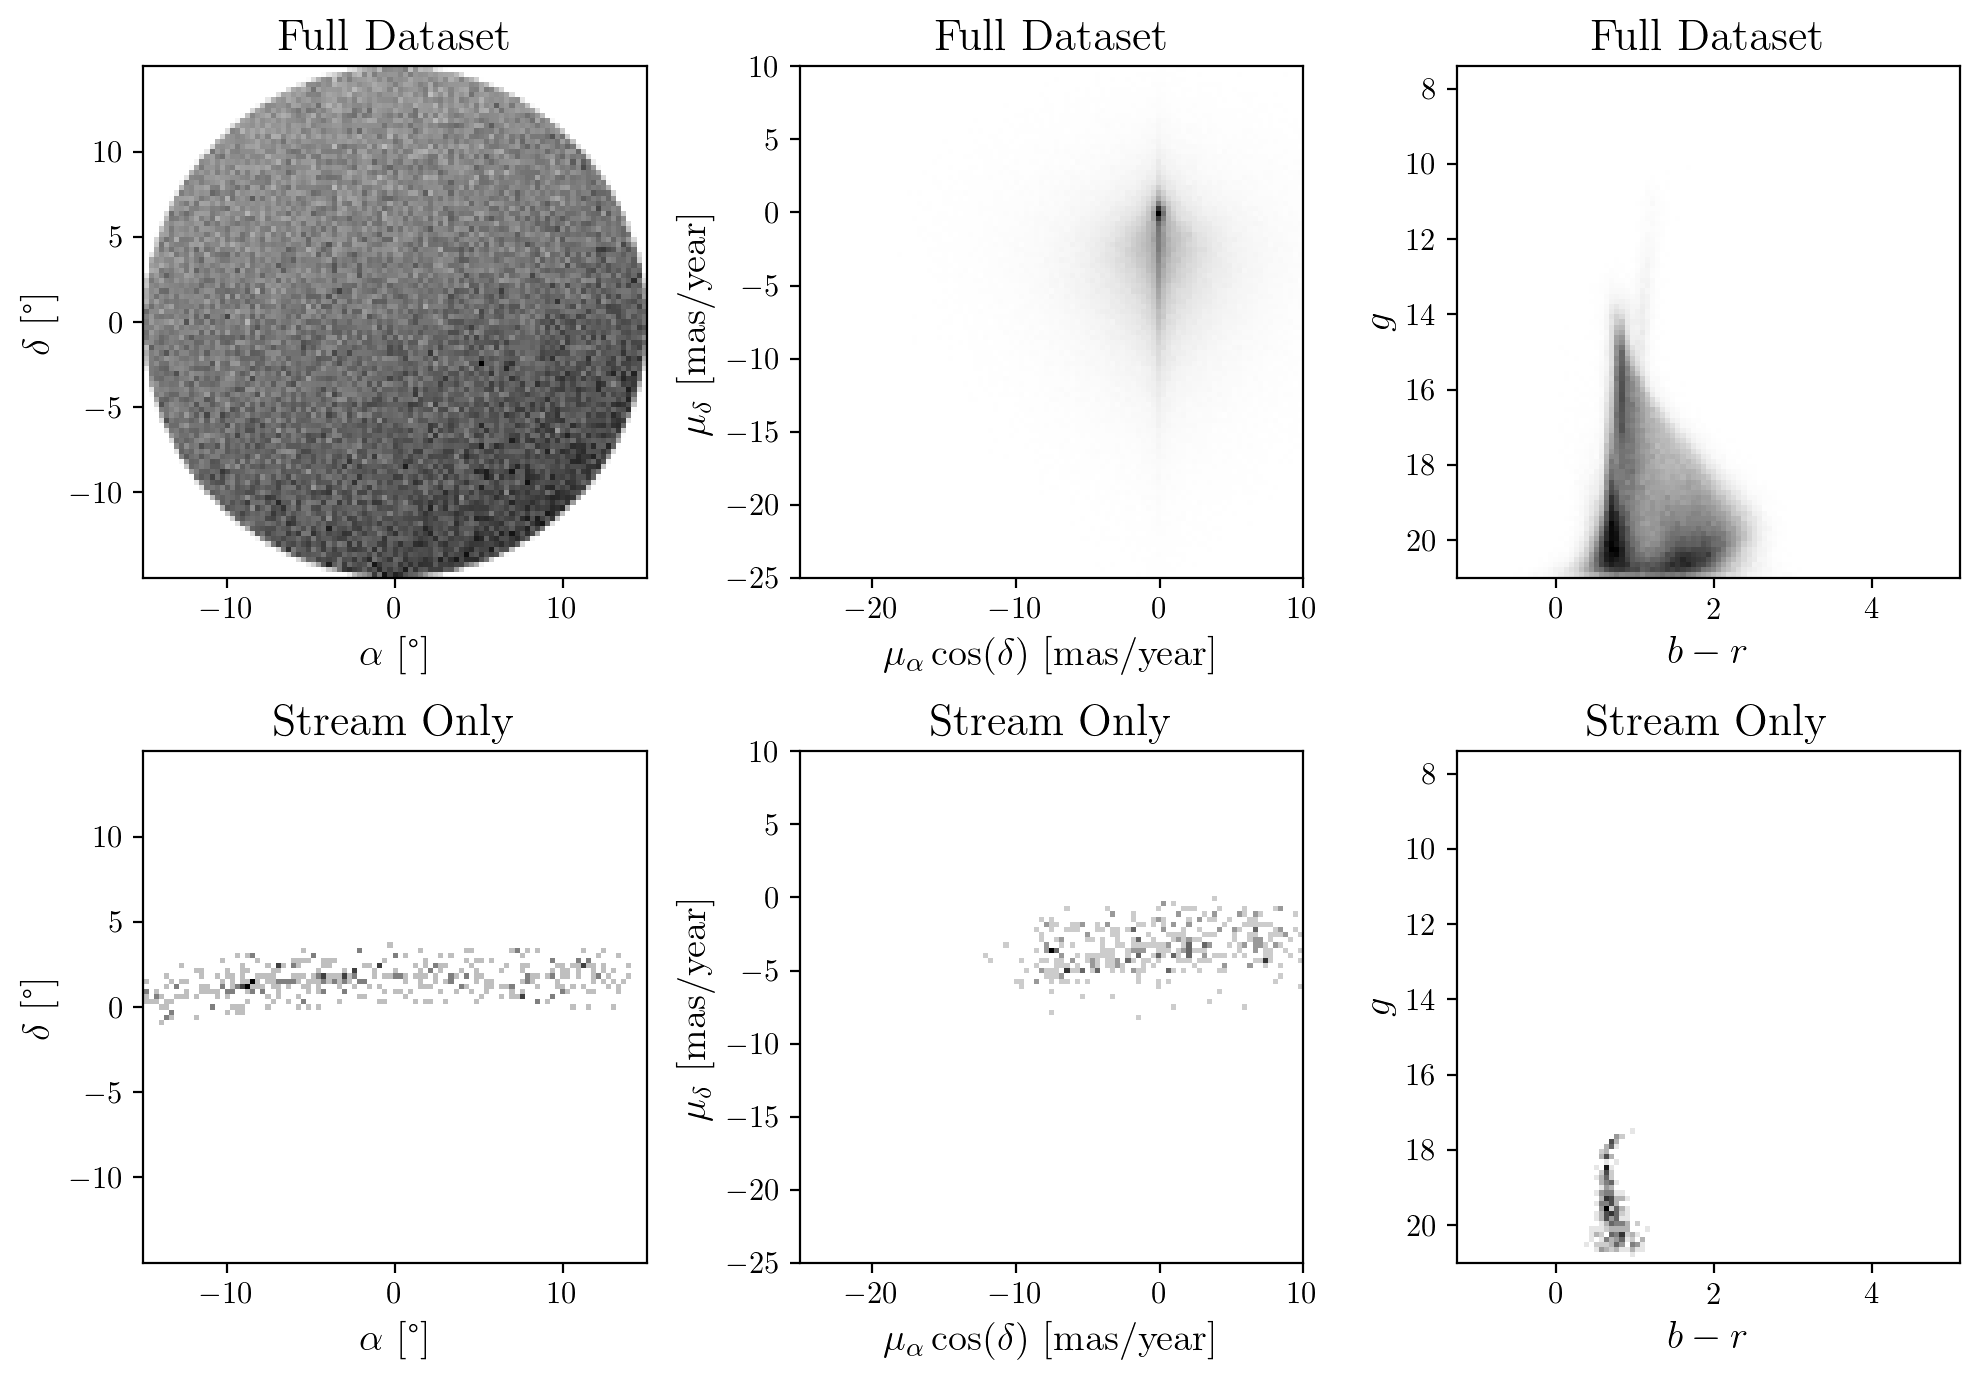

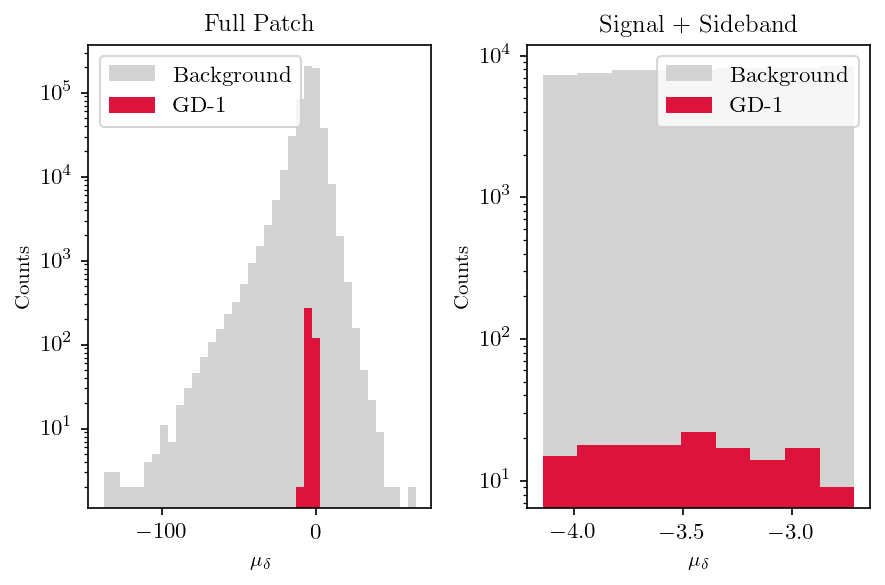

In [3]:
stream = "gd1_tail"
df, file = load_file(stream = stream)
visualize_stream(df, save_folder="gd1_tail")

Sideband region: [-7.8,0.8]
Signal region: [-6.3,-0.6]
Total counts: SR = 267,011, SB = 101,100
Signal region has 379 stream and 266,632 bkg events (0.14%).
Sideband region has 14 stream and 101,086 bkg events (0.01%).
f_sig = 10.3X f_sideband.


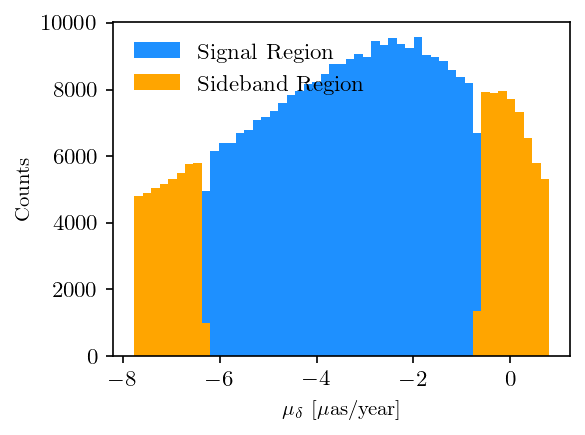

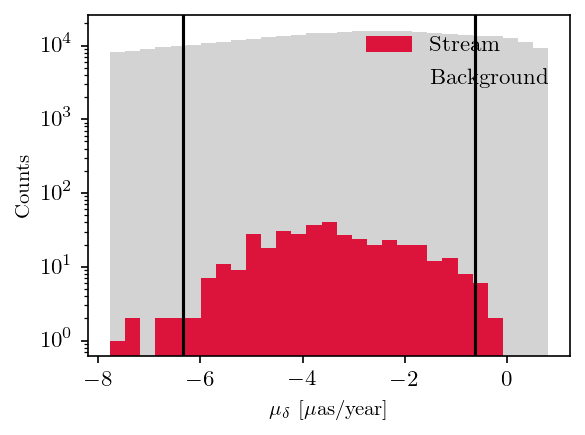

In [4]:
df_slice = signal_sideband(df, stream = stream)

# Train

In [5]:
print("Dataframe has {:,} stars, of which {:,} are stream stars.".format(
    len(df_slice), 
    len(df_slice[df_slice.stream])))

Dataframe has 368,111 stars, of which 393 are stream stars.


In [6]:
tf.keras.backend.clear_session()
df_test = train(df_slice, 
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 50, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 1000, 
      patience = 20,
      verbose = False,
      save_folder = "gd1_tail_widerbands", 
                        )

[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]2022-10-20 15:47:07.621473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 15:47:09.016239: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 40192 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:81:00.0, compute capability: 8.6
2022-10-20 15:47:13.280455: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2301/2301 [==============================] - 6s 3ms/step



[Step 1] k-fold:   0%|          | 0/5 [05:40<?, ?it/s]
Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f458976f160>
Traceback (most recent call last):
  File "/clusterfs/ml4hep/mpettee/miniconda3/envs/gaia_gpu/lib/python3.8/weakref.py", line 345, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Error in callback <bound method AutoreloadMagics.post_execute_hook of <IPython.extensions.autoreload.AutoreloadMagics object at 0x7f4744f8e940>> (for post_execute):



KeyboardInterrupt



KeyboardInterrupt: 